In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv(r'C:\Users\User\Pictures\car data.csv')

In [4]:
df['car_age'] = 2020-df['Year']

In [6]:
df = df.drop(['Car_Name', 'Year'], axis=1)

In [7]:
df.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,car_age
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,6
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,7
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,3
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,9
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,6


In [8]:
df.isnull().sum()

Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
car_age          0
dtype: int64

In [9]:
dff = df.copy()

In [10]:
dff.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,car_age
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,6
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,7
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,3
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,9
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,6


In [11]:
df1 = pd.get_dummies(dff['Fuel_Type'])
df1

,CNG,Diesel,Petrol
0,0,0,1
1,0,1,0
2,0,0,1
3,0,0,1
4,0,1,0
...,...,...,...
296,0,1,0
297,0,0,1
298,0,0,1
299,0,1,0


In [12]:
df2 = pd.get_dummies(dff['Seller_Type'])
df2

,Dealer,Individual
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0
...,...,...
296,1,0
297,1,0
298,1,0
299,1,0


In [13]:
df3 = pd.get_dummies(dff['Transmission'])
df3

,Automatic,Manual
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1
...,...,...
296,0,1
297,0,1
298,0,1
299,0,1


In [14]:
dff = pd.concat([dff, df1, df2, df3], axis=1)
dff.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,car_age,CNG,Diesel,Petrol,Dealer,Individual,Automatic,Manual
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,6,0,0,1,1,0,0,1
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,7,0,1,0,1,0,0,1
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,3,0,0,1,1,0,0,1
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,9,0,0,1,1,0,0,1
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,6,0,1,0,1,0,0,1


In [15]:
dff = dff.drop(['Fuel_Type', 'Seller_Type', 'Transmission'], axis=1)
dff.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,car_age,CNG,Diesel,Petrol,Dealer,Individual,Automatic,Manual
0,3.35,5.59,27000,0,6,0,0,1,1,0,0,1
1,4.75,9.54,43000,0,7,0,1,0,1,0,0,1
2,7.25,9.85,6900,0,3,0,0,1,1,0,0,1
3,2.85,4.15,5200,0,9,0,0,1,1,0,0,1
4,4.60,6.87,42450,0,6,0,1,0,1,0,0,1


In [17]:
X = dff.drop('Selling_Price', axis=1)
y = dff['Selling_Price']

In [20]:
y.head()

0    3.35
1    4.75
2    7.25
3    2.85
4    4.60
Name: Selling_Price, dtype: float64

In [16]:
from sklearn.model_selection import train_test_split

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

In [22]:
from sklearn.linear_model import LinearRegression

In [23]:
reg = LinearRegression()

In [24]:
reg.fit(X_train, y_train)

LinearRegression()

In [26]:
reg.score(X_train, y_train)

0.879844039130107

In [27]:
reg.score(X_test, y_test)

0.8589039971922936

In [30]:
y_pred = reg.predict(X_test)

In [32]:
from sklearn.metrics import r2_score, mean_squared_error

In [31]:
r2_score(y_pred, y_test)

0.8496323662485322

In [33]:
mean_squared_error(y_test, y_pred)

3.7871262249681137

In [34]:
reg.intercept_

4.246200533100766

In [35]:
reg.coef_

array([ 4.45257970e-01, -1.87067298e-05, -8.13577578e-01, -3.19047765e-01,
       -1.07524438e+00,  1.54400189e+00, -4.68757513e-01,  6.10083723e-01,
       -6.10083723e-01,  5.04341411e-01, -5.04341411e-01])

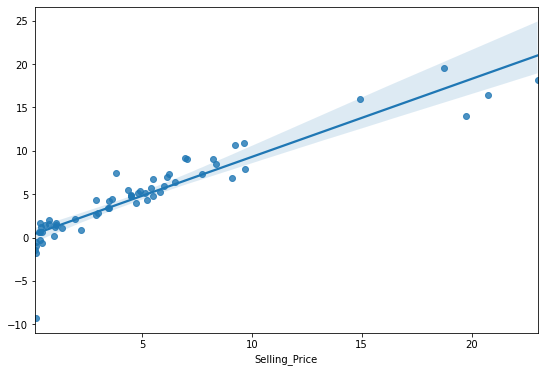

In [36]:
plt.figure(figsize=(9,6))
sns.regplot(y_test, y_pred)